In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_rel_ood_perf,
    plot_raw_ood_perf,
    plot_change_rel_ood_perf,
    plot_change_rel_ood_int,
)

pd.options.display.max_rows = 100

In [2]:
artifacts_fpath = '/local-scratch/nigam/projects/lguo/temp_ds_shift_robustness/clmbr/experiments/clmbr/adapter_artifacts'

## MODEL PERFORMANCE AND ROBUSTNESS

In [3]:
cmap = 'viridis'

y_axis = {
    'auc':{
        'lim':[-0.15, 0.15],
        'lim_raw':[0.65,1],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.25, 0.25],
        'lim_raw':[0,.75],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.06],
        'lim_raw':[0,0.08],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.2],
        'label':'BCE Loss'
    }
}

metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration',
}

models = {
    'lr':'Logistic Regression',
    'gbm':'LightGBM'
}

tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}

train_years = {
    '2009_2010_2011_2012':'09-12',
}

#### ID Performance

In [4]:
df = get_result_table(artifacts_fpath,train_years,tasks,metrics,models)
print("ID Performance of LR Models Trained on 09-12")
display(df)

ID Performance of LR Models Trained on 09-12


Train Group                                        09-12                      
Model                                Logistic Regression              LightGBM
Task                   Metric                                                 
In-Hospital Mortality  AUROC        0.954 (0.939, 0.966)   0.945 (0.93, 0.958)
                       AUPRC         0.386 (0.324, 0.46)    0.372 (0.31, 0.44)
                       Calibration  0.002 (0.001, 0.005)   0.007 (0.005, 0.01)
LOS > 7 Days           AUROC        0.866 (0.856, 0.874)  0.873 (0.864, 0.882)
                       AUPRC        0.627 (0.601, 0.651)  0.662 (0.639, 0.687)
                       Calibration   0.005 (0.001, 0.01)   0.004 (0.001, 0.01)
Readmission in 30 Days AUROC         0.802 (0.78, 0.821)  0.796 (0.773, 0.818)
                       AUPRC        0.265 (0.228, 0.307)  0.265 (0.222, 0.305)
                       Calibration  0.004 (0.001, 0.008)  0.008 (0.004, 0.012)
Admission to ICU       AUROC         0.935 (0.92, 0.948)  0.922 (0.899, 0.941)
                       AUPRC          0.3 (0.234, 0.372)   0.305 (0.236, 0.38)
                       Calibration    0.001 (0.0, 0.004)  0.009 (0.006, 0.012)

#### Change in OOD performance relative to ID Performance 

    Change in OOD performance of models relative to ID performance of models trained on 09-12


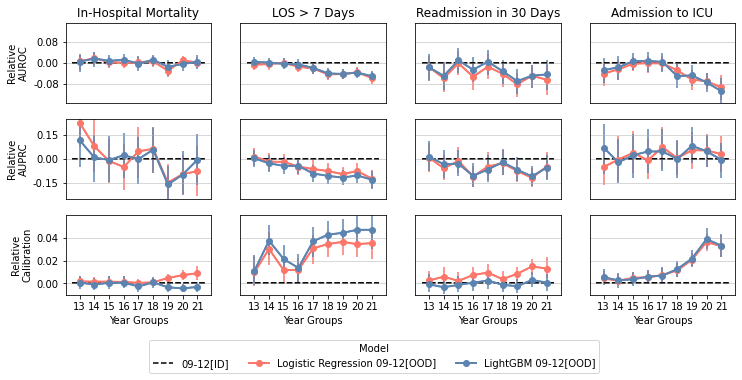

In [5]:
print("\
    Change in OOD performance of models relative to ID performance of models trained on 09-12\
")

plot_rel_ood_perf(
    artifacts_fpath,
    train_years,
    tasks,
    metrics,
    models,
    y_axis,
    legend_bbox_to_anchor=(0.1,-0.5),
    legend_ncols=3,
)

#### The integral of Relative OOD Performance (2013-2021) of CLMBR and Count feature models
- Models trained on CLMBR features show improved robustness in discrimination performance for Long LOS and ICU admission predictions, but sometimes reduced robustness in calibration performance

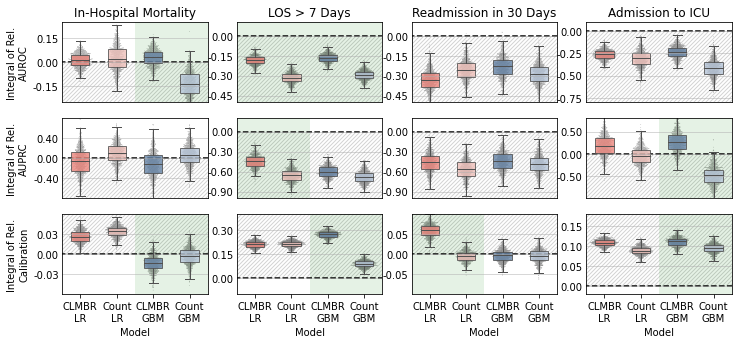

In [11]:
y_axis = {
    'auc':{
        'hospital_mortality':[-0.25, 0.25],
        'LOS_7':[-0.5, 0.1],
        'readmission_30':[-0.5, 0.1],
        'icu_admission':[-0.8, 0.1],
        'label':'AUROC'
    },
    'auprc':{
        'hospital_mortality':[-0.8, 0.8],
        'LOS_7':[-1, 0.2],
        'readmission_30':[-1, 0.2],
        'icu_admission':[-1, 0.8],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'hospital_mortality':[-0.05, 0.05],
        'LOS_7':[-0.1, 0.4],
        'readmission_30':[-0.1, 0.1],
        'icu_admission':[-0.02, 0.18],
        'label':'Calibration'
    },
}

plot_change_rel_ood_int(
    artifacts_fpath=artifacts_fpath,
    tasks=tasks,
    metrics=metrics,
    models=models,
    y_axis=y_axis,
    figsize=(12,5),
    legend_bbox_to_anchor=(-0.5,-0.5),
    plot_significance=True,
    hatch_alpha=0.35,
    swarmplot_size=.5,
    swarmplot_sample_frac=1
)

#### Change in relative OOD performance for each year
- Analysis of change in relative performance at the year level.

    Change in relative OOD performance (to ID performance) between models trained on CLMBR features and models trained count features (CLMBR - count)


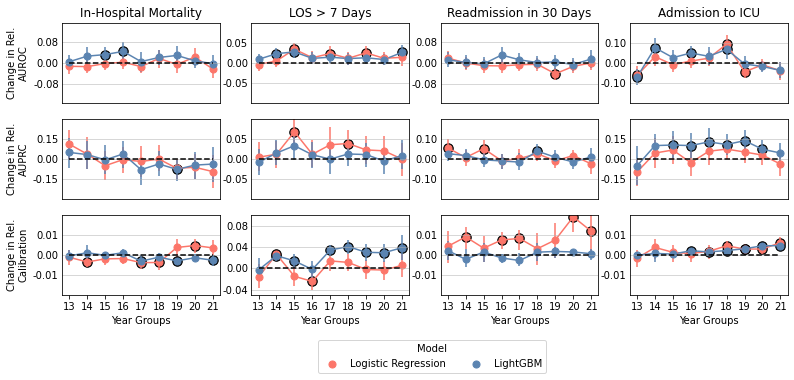

In [12]:
y_axis = {
    'auc':{
        'hospital_mortality':[-0.15, 0.15],
        'LOS_7':[-0.1, 0.1],
        'readmission_30':[-0.15, 0.15],
        'icu_admission':[-0.2, 0.2],
        'label':'AUROC'
    },
    'auprc':{
        'hospital_mortality':[-0.3, 0.3],
        'LOS_7':[-0.1, 0.1],
        'readmission_30':[-0.2, 0.2],
        'icu_admission':[-0.3, 0.3],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'hospital_mortality':[-0.02, 0.02],
        'LOS_7':[-0.05, 0.1],
        'readmission_30':[-0.02, 0.02],
        'icu_admission':[-0.02, 0.02],
        'label':'Calibration'
    },
}

print("\
    Change in relative OOD performance (to ID performance) between models trained on \
CLMBR features and models trained count features (CLMBR - count)\
")

plot_change_rel_ood_perf(
    artifacts_fpath=artifacts_fpath,
    tasks=tasks,
    metrics=metrics,
    models=models,
    y_axis=y_axis,
    figsize=(13,5),
    legend_bbox_to_anchor=(-0.5,-0.5),
    plot_significance=True
)